<a href="https://colab.research.google.com/github/mffajardor/Alura_EsenciaCliente/blob/main/Challenge_2_Esencia_del_Cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revelando la Esencia del Cliente - Parte 1

## 1. Configuración del Ambiente

En esta etapa inicial, nuestro enfoque es preparar el entorno de trabajo. Utilizaremos Google Colab, donde conectaremos nuestro espacio de trabajo con Google Drive para un acceso fácil y seguro a los datos, así como realizar de forma inicial la importación de las librerias para ciencia de datos como Pandas, Matplotlib, Seaborn, Scikit-learn, entre otras. Este paso es crucial para garantizar que nuestro proyecto se desarrolle sin inconvenientes técnicos.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [ ]:
# Versiones de los programas

print(f'matplotlib => {matplotlib.__version__}')
print(f'pandas => {pd.__version__}')
print(f'numpy => {np.__version__}')
print(f'seaborn => {sns.__version__}')
print(f'sklearn => {sklearn.__version__}')

matplotlib => 3.7.1
pandas => 1.5.3
numpy => 1.23.5
seaborn => 0.13.1
sklearn => 1.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Obtención y transformación de los datos

Ahora, nos adentramos en la fase de obtención de datos. El objetivo es cargar y preparar el dataset para su posterior análisis. Este proceso involucra importar los datos desde Google Drive utilizando pandas, una biblioteca fundamental en la ciencia de datos para la manipulación y análisis de datos. Además, adaptaremos el dataset del inglés al español, facilitando su comprensión y análisis. Este paso es esencial para asegurarnos de que trabajamos con datos precisos y bien organizados, sentando las bases para el análisis eficiente en las etapas siguientes.

###2.1 Obtención del dataset inicial

Aqui tomaremos el dataset proporcionado desde la página Web de Kaggle, donde la siguiente URLs se encuentra el dataset que estaremos utilizando:

[Cost Prediction on acquiring Customers.](https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart)



In [ ]:
datos = pd.read_csv("/content/drive/MyDrive/mffajardor@correo.udistrital.edu.co 2023-11-27 20:31/Alura Bootcamp/Challenge/media prediction and its cost.csv", sep = ",")
datos.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


### 2.2 Transformaciones al dataset inicial

In [ ]:
# Enlisto las columnas
columnas = list(datos.select_dtypes(include=['object']).columns)
columnas

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg. yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [ ]:
# Ciclo for para obtener los nombres de cada una y sus items
for columna in columnas:
  print(f"El nombre de la columna es: {columna}")
  print(list(datos[f"{columna}"].value_counts().index))
  print('\n')


El nombre de la columna es: food_category
['Vegetables', 'Snack Foods', 'Dairy', 'Meat', 'Fruit', 'Jams and Jellies', 'Baking Goods', 'Breakfast Foods', 'Bread', 'Canned Soup', 'Beer and Wine', 'Paper Products', 'Bathroom Products', 'Electrical', 'Candy', 'Frozen Desserts', 'Specialty', 'Starchy Foods', 'Magazines', 'Kitchen Products', 'Eggs', 'Hot Beverages', 'Hygiene', 'Pain Relievers', 'Pizza', 'Carbonated Beverages', 'Pure Juice Beverages', 'Cleaning Supplies', 'Side Dishes', 'Frozen Entrees', 'Drinks', 'Plastic Products', 'Hardware', 'Cold Remedies', 'Decongestants', 'Canned Tuna', 'Seafood', 'Canned Anchovies', 'Canned Clams', 'Candles', 'Miscellaneous', 'Canned Oysters', 'Canned Shrimp', 'Packaged Vegetables', 'Canned Sardines']


El nombre de la columna es: food_department
['Produce', 'Snack Foods', 'Household', 'Frozen Foods', 'Baking Goods', 'Canned Foods', 'Dairy', 'Health and Hygiene', 'Beverages', 'Deli', 'Baked Goods', 'Alcoholic Beverages', 'Snacks', 'Starchy Foods', 'Pe

In [ ]:
# Usando el diccionario:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

vivienda_propia={'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}



comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

nombre_columnas_traducidos = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

In [ ]:
# 2. Listar las columnas de tipo objeto y mostrar sus nombres y elementos únicos
columnas_objeto = datos.select_dtypes(include=['object']).columns.tolist()
columnas_objeto

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg. yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [ ]:
datos_renombrados = datos.rename(columns=nombre_columnas_traducidos)
datos_renombrados

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [ ]:
# Ahora, necesitamos traducir los elementos de cada columna utilizando los diccionarios cargados
# Crear un diccionario que relacione las columnas con sus respectivos diccionarios de traducción
diccionarios_columnas = {
    'categoria_alimento': categoria_alimento,
    'departamento': departamento,
    'tipo': tipo,
    'promocion': promocion,
    'pais': pais,
    'estado_civil': estado_civil,
    'genero': genero,
    'escolaridad': escolaridad,
    'miembro': miembro,
    'ocupacion': ocupacion,
    'vivienda_propia': vivienda_propia,
    'ingreso_anual': ingreso_anual,
    'comercio': comercio,
    # 'tipo_tienda': tipo_tienda,
    # 'ciudad_tienda': ciudad_tienda,
    # 'estado_tienda': estado_tienda,
    # 'tipo_medio': tipo_medio
}

# Excluir las columnas para las cuales no tenemos diccionarios de traducción
diccionarios_columnas_disponibles = {k: v for k, v in diccionarios_columnas.items() if k in datos_renombrados.columns}

# Ciclo para traducir los elementos de las columnas disponibles
for columna in diccionarios_columnas:
    if columna in datos_renombrados.columns:
        diccionario = diccionarios_columnas[columna]
        datos_renombrados[columna] = datos_renombrados[columna].map(diccionario).fillna(datos_renombrados[columna])

# Verificar las primeras filas del dataframe para asegurar que la traducción es correcta
datos_renombrados.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
datos_renombrados.columns

Index(['categoria_alimento', 'departamento', 'tipo',
       'ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)', 'promocion', 'pais', 'estado_civil',
       'genero', 'total_de_hijos', 'escolaridad', 'miembro', 'ocupacion',
       'vivienda_propia', 'promedio_autos(aprox)', 'ingreso_anual',
       'numero_hijos', 'promedio_autos(aprox)', 'marca', 'precio_recomendado',
       'peso_bruto', 'peso_neto', 'empaque_reciclable', 'bajo_en_grasa',
       'unidades_por_caja', 'comercio', 'ciudad', 'estado',
       'pies_cuadrados_tienda', 'pies_cuadrados_comestibles',
       'pies_cuadrados_congelados', 'pies_cuadrados_carne', 'cafeteria',
       'tienda_de_videos', 'barra_de_ensaladas', 'comida_preparada',
       'floristeria', 'divulgacion', 'costo'],
      dtype='object')

In [ ]:
datos_renombrados.to_csv('/content/drive/MyDrive/mffajardor@correo.udistrital.edu.co 2023-11-27 20:31/Alura Bootcamp/Challenge/media prediction_translated.csv', encoding='utf-8-sig', index=False)

## 3. Exploración de los datos

En esta etapa, nuestro foco está en explorar y entender el dataset a través de técnicas de visualización de datos. Utilizando Matplotlib y Seaborn, dos potentes bibliotecas para la visualización gráfica, examinaremos las características clave de los datos, como distribuciones y correlaciones. Esta exploración visual no solo nos ayuda a entender mejor nuestros datos, sino que también nos permite identificar patrones, tendencias y anomalías, elementos fundamentales para la toma de decisiones y la generación de hipótesis en el campo de la ciencia de datos.

### 3.1 Determinación de correlaciones entre variables

Dentro de las variables de interés que vamos a considerar para observar con más detenimiento la información del dataset se encuentran:


*   Escolaridad
*   Ocupación
*   Miembro
*   Género
*   Estado Civil
*   Número de Hijos
*   Ingresos anuales
*   Categoría de alimentos
*   Tipo


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuración de estilos para los gráficos
sns.set(style="whitegrid")

def graficar_histograma(dataframe, columna, titulo, xlabel, ylabel, bins=None, kde=False):
    """
    Función para crear un histograma.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dataframe, x=columna, kde=kde, bins=bins)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def graficar_barras(dataframe, columna, titulo, xlabel, ylabel, rotacion=0):
    """
    Función para crear un gráfico de barras.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataframe, x=columna)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotacion)
    plt.show()

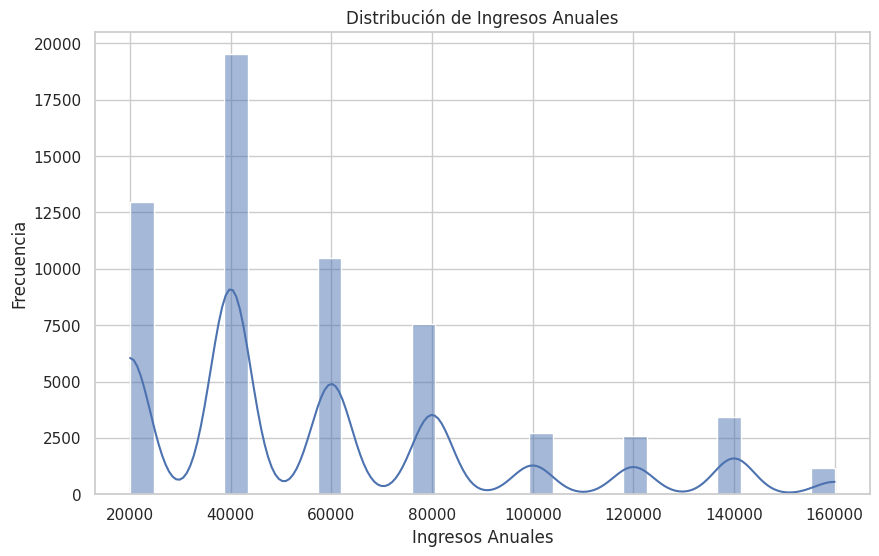

In [ ]:
# Graficar Histograma de Ingresos Anuales
graficar_histograma(datos_renombrados, 'ingreso_anual', 'Distribución de Ingresos Anuales',
                    'Ingresos Anuales', 'Frecuencia', bins=30, kde=True)

**Ingreso Anual:**

Los ingresos anuales de los clientes varían entre 20,000 y 160,000 USD, con una media de 58,312 USD. La mayoría de los clientes (50%) tienen ingresos anuales de alrededor de 40,000 USD.

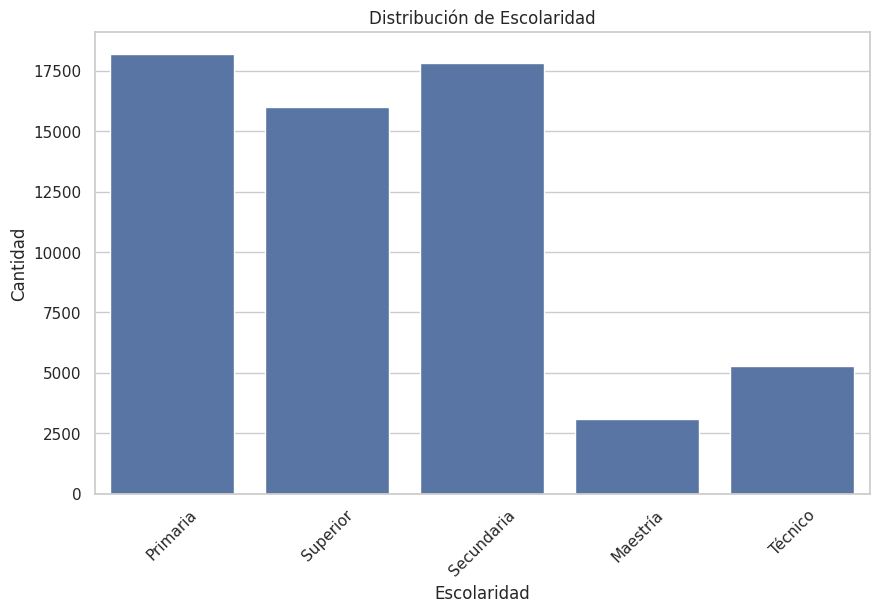

In [ ]:
# Graficar la Escolaridad - Gráfico de Barras
graficar_barras(datos_renombrados, 'escolaridad', 'Distribución de Escolaridad',
                'Escolaridad', 'Cantidad', rotacion=45)

**Escolaridad:**

La gráfica de escolaridad presenta una distribución de categorías educativas en la que la escolaridad primaria, secundaria y superior son las más comunes entre los clientes, con una cantidad significativamente menor de clientes con maestría o educación técnica. Esto podría reflejar el nivel de educación accesible o preferido en la población cliente.

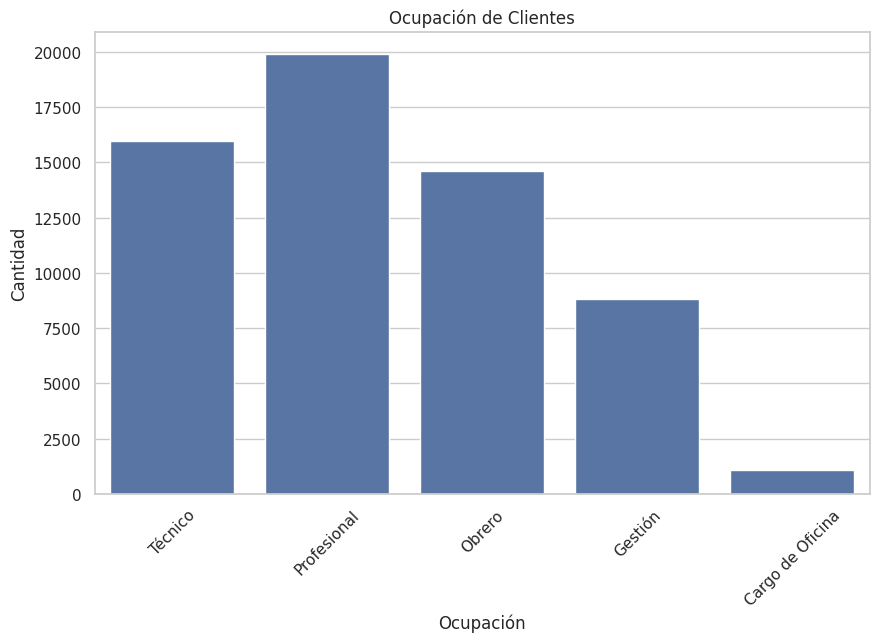

In [ ]:
graficar_barras(datos_renombrados, 'ocupacion', 'Ocupación de Clientes',
                'Ocupación', 'Cantidad', rotacion=45)

**Ocupación de Clientes:**

En la gráfica de ocupación, la mayoría de los clientes se clasifican como profesionales o técnicos, con menos clientes reportados como obreros, en gestión o en cargos de oficina. Este patrón puede influir en las decisiones de marketing y oferta de productos, dado que las ocupaciones pueden correlacionar con diferentes hábitos de consumo.

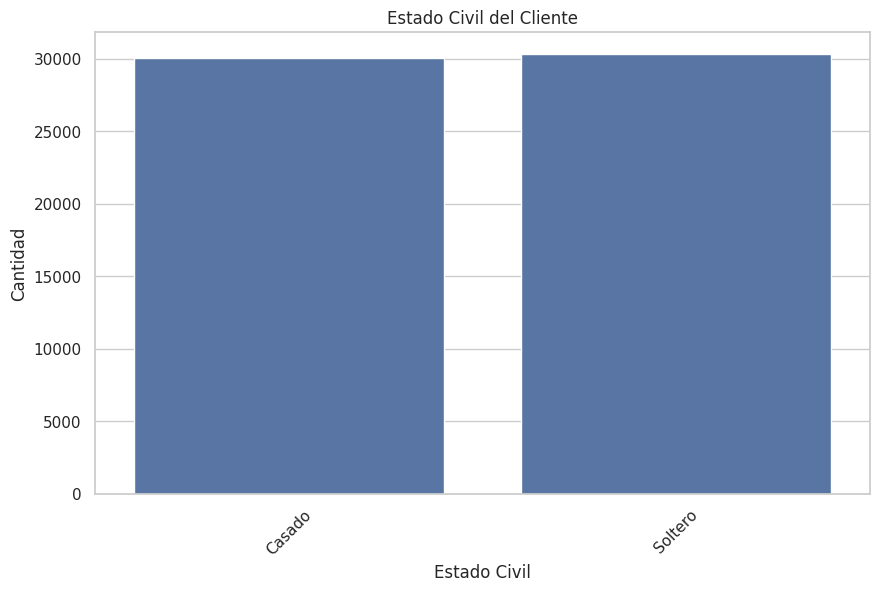

In [ ]:
graficar_barras(datos_renombrados, 'estado_civil', 'Estado Civil del Cliente',
                'Estado Civil', 'Cantidad', rotacion=45)

**Estado Civil del Cliente:**

La distribución del estado civil muestra una división bastante equitativa entre clientes casados y solteros, lo que sugiere que el estado civil puede no ser un diferenciador significativo en los hábitos de consumo o podría requerir un análisis más profundo en conjunto con otras variables.

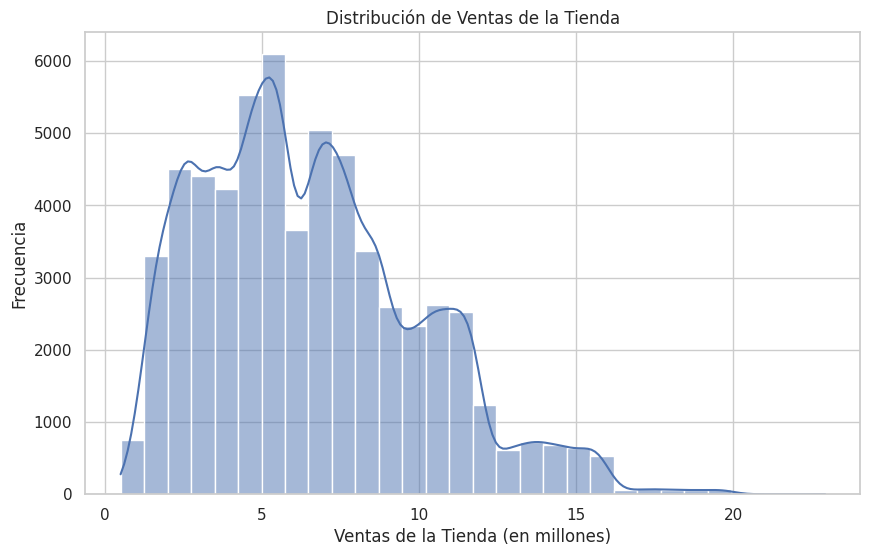

In [ ]:
# Histograma de Ventas de la Tienda (en millones)
graficar_histograma(datos_renombrados, 'ventas_tienda(en millones)', 'Distribución de Ventas de la Tienda',
                    'Ventas de la Tienda (en millones)', 'Frecuencia', bins=30, kde=True)

**Ventas de la Tienda (en millones):**

Las ventas tienden a variar entre 0.51 y 22.92 millones, con una media de aproximadamente 6.54 millones. La mayor concentración de puntos de datos (50% de los datos, también conocido como el percentil 50 o la mediana) se sitúa en torno a los 5.94 millones, lo que indica que la mayoría de las tiendas tienen ventas cercanas a este valor.

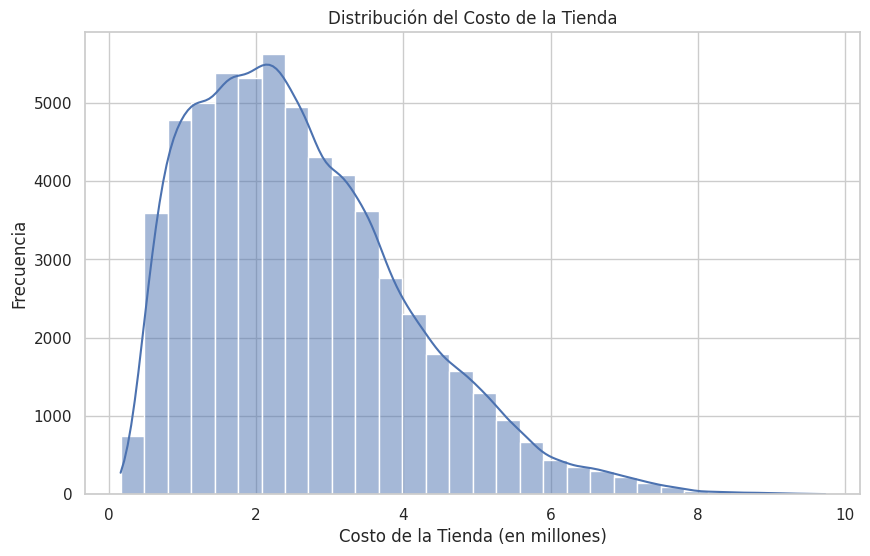

In [ ]:
# Histograma del Costo de la Tienda (en millones)
graficar_histograma(datos_renombrados, 'costo_tienda(en millones)', 'Distribución del Costo de la Tienda',
                    'Costo de la Tienda (en millones)', 'Frecuencia', bins=30, kde=True)

**Costo de la Tienda (en millones):**

Los costos oscilan entre 0.1632 y 9.7265 millones, con una media de 2.62 millones. Esto refleja que, en promedio, el costo de funcionamiento de una tienda es menos de la mitad de las ventas totales.

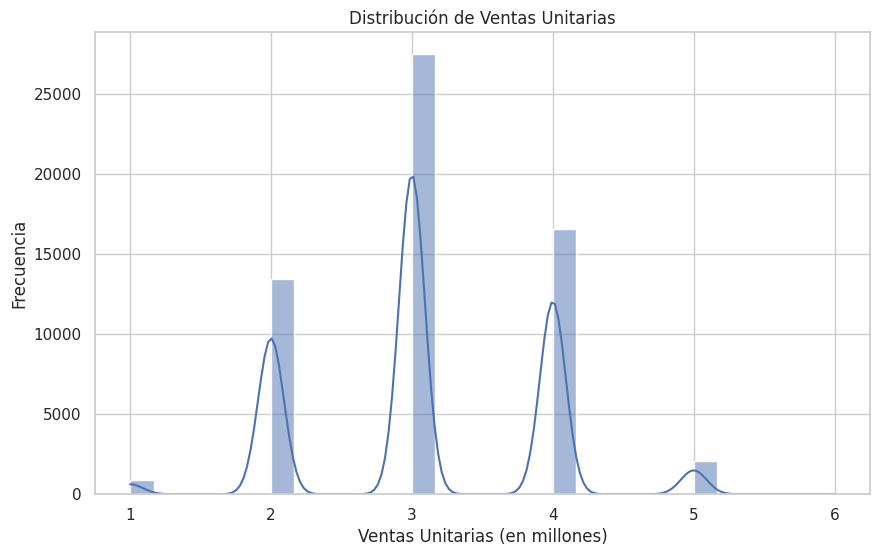

In [ ]:
# Histograma de Ventas Unitarias (en millones)
graficar_histograma(datos_renombrados, 'ventas_unitarias(en millones)', 'Distribución de Ventas Unitarias',
                    'Ventas Unitarias (en millones)', 'Frecuencia', bins=30, kde=True)

**Ventas Unitarias (en millones):**

Las ventas unitarias tienen un rango de 1 a 6 millones, con una media de 3.09 millones. La mayoría de las tiendas parecen vender alrededor de 3 millones de unidades, ya que tanto el percentil 50 como la mediana se sitúan en ese valor.

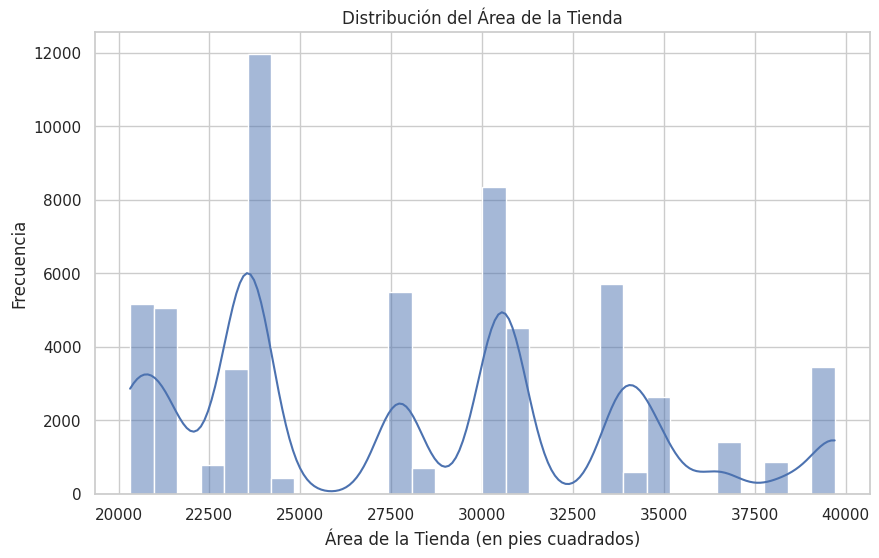

In [ ]:
# Histograma del Área de la Tienda (en pies cuadrados)
graficar_histograma(datos_renombrados, 'pies_cuadrados_tienda', 'Distribución del Área de la Tienda',
                    'Área de la Tienda (en pies cuadrados)', 'Frecuencia', bins=30, kde=True)

## 4. Preprocesamiento y Obtención de Features

En esta fase, nos centraremos en preparar nuestros datos para el análisis. Inicialmente, abordaremos el desafío de las variables categóricas. Utilizaremos técnicas de codificación, como one-hot-encoding o asignación de valores numéricos, para que estas variables sean interpretables por el modelo de clusterización. Es esencial elegir cuidadosamente qué variables categóricas codificar, enfocándonos solo en aquellas relevantes para nuestro análisis.

Una vez codificadas nuestras variables, procederemos a la selección de las más significativas para el estudio. Nuestro objetivo es agrupar a los clientes en clusters que revelen patrones significativos en sus hábitos de compra. Seleccionaremos entre 6 y 12 atributos clave, y luego estandarizaremos estos datos para asegurarnos de que todas las variables contribuyan equitativamente al modelo. Esta estandarización se realizará utilizando **StandardScaler** de Scikit-learn, lo que nos dará un conjunto de datos numéricos, homogéneos y listos para la clusterización.

In [ ]:
# Importe de librerias
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Seleccionar columnas relevantes para la clusterización
selected_columns = [
    "categoria_alimento", "departamento", "tipo", "ventas_tienda(en millones)",
    "costo_tienda(en millones)", "ventas_unitarias(en millones)", "promocion",
    "pais", "estado_civil", "genero", "total_de_hijos", "ingreso_anual", "costo",
    "escolaridad","ocupacion"
]

# Creamos un nuevo DataFrame con las columnas seleccionadas corregidas
df_relevant = datos_renombrados[selected_columns].copy()

# Convertimos variables categóricas a numéricas usando pd.get_dummies
df_encoded = pd.get_dummies(df_relevant, drop_first=True)
df_encoded

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,ingreso_anual,costo,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,...,estado_civil_Soltero,genero_Masculino,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico
0,7.36,2.7232,4.0,1.0,20000,126.62,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,5.52,2.5944,3.0,0.0,60000,59.86,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,3.68,1.3616,2.0,4.0,20000,84.16,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,3.68,1.1776,2.0,2.0,40000,95.78,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,4.08,1.4280,3.0,0.0,40000,50.79,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1.0,20000,95.25,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
60424,1.60,0.4960,1.0,2.0,40000,69.42,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
60425,5.52,2.5392,2.0,1.0,40000,67.51,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
60426,8.28,2.5668,3.0,2.0,80000,132.88,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0


In [ ]:
# Escalamos las características numéricas
scaler = StandardScaler()
X_std= scaler.fit_transform(df_encoded)
X_std

array([[ 0.23649007,  0.07139762,  1.09564344, ..., -0.56504285,
        -0.70112096,  1.66671251],
       [-0.2948384 , -0.01724677, -0.11256748, ..., -0.56504285,
         1.4262874 , -0.5999835 ],
       [-0.82616687, -0.86570019, -1.32077839, ...,  1.76977727,
        -0.70112096, -0.5999835 ],
       ...,
       [-0.2948384 , -0.05523722, -1.32077839, ...,  1.76977727,
        -0.70112096, -0.5999835 ],
       [ 0.50215431, -0.036242  , -0.11256748, ..., -0.56504285,
         1.4262874 , -0.5999835 ],
       [ 0.76781854,  1.10980329,  1.09564344, ...,  1.76977727,
        -0.70112096, -0.5999835 ]])

## 5. Clusterización y Validación

Ahora nos adentramos en la fase crítica de clusterización y validación. Empezaremos aplicando algoritmos de clusterización, como KMeans, Mean Shift o DBSCAN, para identificar el número óptimo de clusters. La elección del algoritmo dependerá del comportamiento de nuestros datos y del tipo de agrupación que deseamos obtener.

En el proceso de validación, experimentaremos con diferentes números de clusters, evaluando su estructura y estabilidad mediante métricas como Silhouette, Davies-Bouldin y Calinski-Harabasz. Estas métricas nos ayudarán a determinar la configuración más adecuada para nuestros clusters, buscando maximizar la homogeneidad dentro de cada cluster y la heterogeneidad entre ellos.

Además, evaluaremos la estabilidad de los clusters dividiendo nuestro conjunto de datos en partes iguales y repitiendo el proceso de validación en cada segmento. Este paso es crucial para asegurarnos de que los clusters son consistentes y no varían significativamente entre diferentes muestras del dataset.

Finalmente, instanciaremos el modelo de clusterización con la configuración óptima y crearemos un nuevo atributo en el dataset para almacenar los labels de los clusters. Esta última etapa nos permitirá analizar y comparar los grupos, identificando patrones y características específicas de cada cluster.


In [ ]:
# Realizar clustering con un rango de número de clusters y calcular el coeficiente de silueta para cada uno
# Extendemos el análisis para incluir otros métodos de evaluación de clusters
def calcular_metricas_clustering(datos, rango_clusters):
    resultados = {
        'n_clusters': [],
        'silhouette': [],
        'davies_bouldin': [],
        'calinski_harabasz': []
    }

    # Convertir los datos a una matriz densa si es necesario
    if hasattr(datos, "toarray"):
        datos = datos.toarray()

    for n_clusters in rango_clusters:
        # Especificar n_init explícitamente para evitar la advertencia
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
        labels = kmeans.fit_predict(datos)

        silhouette_avg = silhouette_score(datos, labels)
        davies_bouldin = davies_bouldin_score(datos, labels)
        calinski_harabasz = calinski_harabasz_score(datos, labels)

        resultados['n_clusters'].append(n_clusters)
        resultados['silhouette'].append(silhouette_avg)
        resultados['davies_bouldin'].append(davies_bouldin)
        resultados['calinski_harabasz'].append(calinski_harabasz)

        # Imprimir los resultados del número actual de clusters
        print(f"Número de clusters: {n_clusters}")
        print(f"Coeficiente de Silueta: {silhouette_avg:.2f}")
        print(f"Índice Davies-Bouldin: {davies_bouldin:.2f}")
        print(f"Índice Calinski-Harabasz: {calinski_harabasz:.2f}\n")

    return pd.DataFrame(resultados)

# Asegúrate de que X_processed es una matriz densa antes de llamar a


In [ ]:
# Calcular métricas para un rango de clusters del 2 al 10
rango_clusters = range(3, 11)
resultados_clustering = calcular_metricas_clustering(X_std, rango_clusters)
resultados_clustering

Número de clusters: 3
Coeficiente de Silueta: 0.07
Índice Davies-Bouldin: 4.60
Índice Calinski-Harabasz: 1354.61

Número de clusters: 4
Coeficiente de Silueta: -0.02
Índice Davies-Bouldin: 4.01
Índice Calinski-Harabasz: 1167.97

Número de clusters: 5
Coeficiente de Silueta: -0.00
Índice Davies-Bouldin: 4.24
Índice Calinski-Harabasz: 1171.41

Número de clusters: 6
Coeficiente de Silueta: -0.02
Índice Davies-Bouldin: 4.65
Índice Calinski-Harabasz: 1140.47

Número de clusters: 7
Coeficiente de Silueta: -0.01
Índice Davies-Bouldin: 4.13
Índice Calinski-Harabasz: 1162.97

Número de clusters: 8
Coeficiente de Silueta: 0.01
Índice Davies-Bouldin: 3.62
Índice Calinski-Harabasz: 1045.11

Número de clusters: 9
Coeficiente de Silueta: -0.00
Índice Davies-Bouldin: 4.04
Índice Calinski-Harabasz: 1103.39

Número de clusters: 10
Coeficiente de Silueta: 0.01
Índice Davies-Bouldin: 4.02
Índice Calinski-Harabasz: 1041.60



,n_clusters,silhouette,davies_bouldin,calinski_harabasz
0,3,0.067535,4.597359,1354.608113
1,4,-0.017520,4.011781,1167.973622
2,5,-0.004408,4.235942,1171.409763
3,6,-0.019176,4.648416,1140.468000
4,7,-0.011783,4.128821,1162.970445
5,8,0.014145,3.616816,1045.106000
6,9,-0.000481,4.036324,1103.387761
7,10,0.010875,4.019469,1041.604950


In [ ]:
# Calcular métricas para un rango de clusters del 2 al 10
rango_clusters = range(3, 11)
resultados_clustering_v2 = calcular_metricas_clustering(df_encoded, rango_clusters)
resultados_clustering_v2

Número de clusters: 3
Coeficiente de Silueta: 0.70
Índice Davies-Bouldin: 0.49
Índice Calinski-Harabasz: 244857.52

Número de clusters: 4
Coeficiente de Silueta: 0.72
Índice Davies-Bouldin: 0.40
Índice Calinski-Harabasz: 301430.89

Número de clusters: 5
Coeficiente de Silueta: 0.91
Índice Davies-Bouldin: 0.27
Índice Calinski-Harabasz: 525126.31

Número de clusters: 6
Coeficiente de Silueta: 0.94
Índice Davies-Bouldin: 0.30
Índice Calinski-Harabasz: 1065006.00

Número de clusters: 7
Coeficiente de Silueta: 0.98
Índice Davies-Bouldin: 0.16
Índice Calinski-Harabasz: 2248902.49

Número de clusters: 8
Coeficiente de Silueta: 1.00
Índice Davies-Bouldin: 0.00
Índice Calinski-Harabasz: 12192695555.25

Número de clusters: 9
Coeficiente de Silueta: 0.87
Índice Davies-Bouldin: 0.12
Índice Calinski-Harabasz: 14006665636.37

Número de clusters: 10
Coeficiente de Silueta: 0.78
Índice Davies-Bouldin: 0.22
Índice Calinski-Harabasz: 15855661824.15



,n_clusters,silhouette,davies_bouldin,calinski_harabasz
0,3,0.697196,0.493431,2.448575e+05
1,4,0.721448,0.400694,3.014309e+05
2,5,0.909869,0.273512,5.251263e+05
3,6,0.943464,0.298279,1.065006e+06
4,7,0.976485,0.160278,2.248902e+06
5,8,0.998208,0.002669,1.219270e+10
6,9,0.867966,0.123533,1.400667e+10
7,10,0.784040,0.216380,1.585566e+10


Podemos observar que con el dataframe estandarizado **X_std** los valores de los coeficientes de 'Silhouette', 'Davies-Bouldin', y 'Calinski-Harabasz', son muy bajos, por lo que al final se utiliza el dataframe sin estandarizar **df_encoded**, donde se observa que cumple con los criterios dados en las métricas.



Ahora podemos complementar el número optimo de clusters usando la **regla del Codo** de la siguiente forma:

In [ ]:
from sklearn.cluster import KMeans

inertias = []
rango_clusters = range(3, 11)

for n_clusters in rango_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_encoded)
    inertias.append(kmeans.inertia_)

inertias

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[8646566226359.101,
 4930715524061.297,
 2201213701858.484,
 883228755989.6028,
 350934405645.56104,
 55729212.78986399,
 42447586.62648728,
 33330490.850835115]

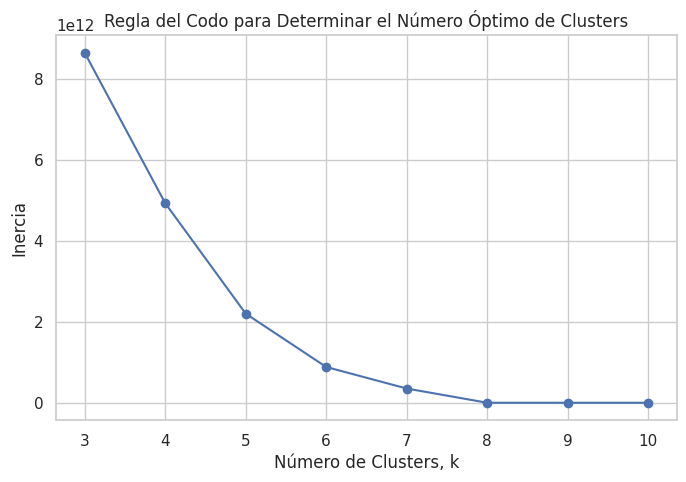

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, inertias, '-o')
plt.xlabel('Número de Clusters, k')
plt.ylabel('Inercia')
plt.title('Regla del Codo para Determinar el Número Óptimo de Clusters')
plt.xticks(rango_clusters)
plt.show()


Basado en la gráfica de la regla del codo y los valores de las métricas de clustering para el conjunto de datos no estandarizado, se selecciona k=6 como el número óptimo de clusters. Esta elección se justifica por la presencia de un "codo" en la gráfica y por los valores robustos de las métricas asociadas, incluyendo un coeficiente de Silhouette alto, un índice Davies-Bouldin bajo y un índice Calinski-Harabasz elevado. Este número de clusters permitirá una segmentación efectiva de los clientes, proporcionando una base sólida para estrategias diferenciadas y servicios personalizados.

### Validación contra Datos Aleatorios:

Se genera un conjunto de datos aleatorios, el cual se compara las métricas de clustering con las obtenidas de los datos reales.

In [ ]:
import numpy as np

# Generar datos aleatorios
random_data = np.random.rand(X_std.shape[0], X_std.shape[1])
rango_datos = range(3,11)

resultados_clustering_random = calcular_metricas_clustering(random_data, rango_datos)

Número de clusters: 3
Coeficiente de Silueta: 0.00
Índice Davies-Bouldin: 12.12
Índice Calinski-Harabasz: 274.85

Número de clusters: 4
Coeficiente de Silueta: 0.00
Índice Davies-Bouldin: 11.17
Índice Calinski-Harabasz: 243.24

Número de clusters: 5
Coeficiente de Silueta: 0.00
Índice Davies-Bouldin: 10.56
Índice Calinski-Harabasz: 219.30

Número de clusters: 6
Coeficiente de Silueta: 0.00
Índice Davies-Bouldin: 10.04
Índice Calinski-Harabasz: 201.03

Número de clusters: 7
Coeficiente de Silueta: 0.00
Índice Davies-Bouldin: 9.70
Índice Calinski-Harabasz: 186.08

Número de clusters: 8
Coeficiente de Silueta: 0.00
Índice Davies-Bouldin: 9.37
Índice Calinski-Harabasz: 174.19

Número de clusters: 9
Coeficiente de Silueta: 0.00
Índice Davies-Bouldin: 9.16
Índice Calinski-Harabasz: 163.82

Número de clusters: 10
Coeficiente de Silueta: 0.00
Índice Davies-Bouldin: 8.96
Índice Calinski-Harabasz: 154.68



In [ ]:
resultados_clustering_random

,n_clusters,silhouette,davies_bouldin,calinski_harabasz
0,3,0.004599,12.119874,274.850804
1,4,0.004399,11.170758,243.243336
2,5,0.004313,10.558286,219.297633
3,6,0.004308,10.043208,201.025955
4,7,0.004265,9.704104,186.081898
5,8,0.004288,9.368910,174.193691
6,9,0.004300,9.163908,163.820906
7,10,0.004314,8.960344,154.678140


### Evaluación estabilidad Clusters

In [ ]:
# Dividir el conjunto de datos en 3 partes iguales
sets = np.array_split(df_encoded.to_numpy(), 3)

# Imprimir la forma de cada conjunto
for i, set_i in enumerate(sets, start=1):
    print(f"Set {i} tiene {set_i.shape[0]} filas y {set_i.shape[1]} columnas")

Set 1 tiene 20143 filas y 132 columnas
Set 2 tiene 20143 filas y 132 columnas
Set 3 tiene 20142 filas y 132 columnas


In [ ]:
# Evaluar la estabilidad de los clusters
mejor_numero_clusters = 6  # Tomamos el número optimo obtenido del paso anterior

# Crear un DataFrame para almacenar los resultados de las métricas
resultados_estabilidad = pd.DataFrame(columns=['Set', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])

for i, set_i in enumerate(sets, start=1):
    kmeans_set = KMeans(n_clusters=mejor_numero_clusters, random_state=42)
    labels_set = kmeans_set.fit_predict(set_i)

    silhouette_avg_set = silhouette_score(set_i, labels_set)
    davies_bouldin_set = davies_bouldin_score(set_i, labels_set)
    calinski_harabasz_set = calinski_harabasz_score(set_i, labels_set)

    print(f"Set {i}: Coeficiente de Silueta: {silhouette_avg_set:.2f}")
    print(f"Set {i}: Índice Davies-Bouldin: {davies_bouldin_set:.2f}")
    print(f"Set {i}: Índice Calinski-Harabasz: {calinski_harabasz_set:.2f}\n")

    # Añadir los resultados al DataFrame
    resultados_estabilidad = resultados_estabilidad.append({
        'Set': f'Set {i}',
        'Silhouette': silhouette_avg_set,
        'Davies-Bouldin': davies_bouldin_set,
        'Calinski-Harabasz': calinski_harabasz_set
    }, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Set 1: Coeficiente de Silueta: 0.94
Set 1: Índice Davies-Bouldin: 0.30
Set 1: Índice Calinski-Harabasz: 359509.52



<ipython-input-21-1634f65c8b3f>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_estabilidad = resultados_estabilidad.append({
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Set 2: Coeficiente de Silueta: 0.94
Set 2: Índice Davies-Bouldin: 0.30
Set 2: Índice Calinski-Harabasz: 349941.65



<ipython-input-21-1634f65c8b3f>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_estabilidad = resultados_estabilidad.append({
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Set 3: Coeficiente de Silueta: 0.94
Set 3: Índice Davies-Bouldin: 0.30
Set 3: Índice Calinski-Harabasz: 355540.72



<ipython-input-21-1634f65c8b3f>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados_estabilidad = resultados_estabilidad.append({


In [ ]:
# Mostrar el DataFrame de resultados
resultados_estabilidad

,Set,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,Set 1,0.944587,0.297459,359509.522462
1,Set 2,0.943046,0.299121,349941.651377
2,Set 3,0.942725,0.298172,355540.715314


Ahora vamos a realizar la evaluación de estabilidad para el número de Clusters que hemos seleccionado que en este caso es 6, procurando que cuando se vaya a comparar las métricas de clustering de los diferentes segmentos del conjunto de datos (set_1, set_2, ..., set_n) y se asegure de que la variación en las métricas de clustering no sea mayor al ±5% entre ellos.

In [ ]:
# Calcular la variación máxima permitida (±5%)
variacion_maxima = 0.05

# Calcular la media de las métricas
media_silhouette = resultados_estabilidad['Silhouette'].mean()
media_davies_bouldin = resultados_estabilidad['Davies-Bouldin'].mean()
media_calinski_harabasz = resultados_estabilidad['Calinski-Harabasz'].mean()

media_silhouette, media_davies_bouldin, media_calinski_harabasz

(0.9434529198344968, 0.298250743520112, 354997.2963842402)

In [ ]:
# Calcular la variación respecto a la media de las métricas
resultados_estabilidad['Var_Silhouette'] = resultados_estabilidad['Silhouette'].apply(lambda x: abs(x - media_silhouette) / media_silhouette)
resultados_estabilidad['Var_Davies-Bouldin'] = resultados_estabilidad['Davies-Bouldin'].apply(lambda x: abs(x - media_davies_bouldin) / media_davies_bouldin)
resultados_estabilidad['Var_Calinski-Harabasz'] = resultados_estabilidad['Calinski-Harabasz'].apply(lambda x: abs(x - media_calinski_harabasz) / media_calinski_harabasz)

# Calcular la variación respecto a la media de las métricas
resultados_estabilidad['Var_Silhouette (%)'] = resultados_estabilidad['Silhouette'].apply(lambda x: 100 * abs(x - media_silhouette) / media_silhouette)
resultados_estabilidad['Var_Davies-Bouldin (%)'] = resultados_estabilidad['Davies-Bouldin'].apply(lambda x: 100 * abs(x - media_davies_bouldin) / media_davies_bouldin)
resultados_estabilidad['Var_Calinski-Harabasz (%)'] = resultados_estabilidad['Calinski-Harabasz'].apply(lambda x: 100 * abs(x - media_calinski_harabasz) / media_calinski_harabasz)

# Verificar si alguna de las variaciones excede la variación máxima permitida
estabilidad_silhouette = all(resultados_estabilidad['Var_Silhouette (%)'] < variacion_maxima * 100)
estabilidad_davies_bouldin = all(resultados_estabilidad['Var_Davies-Bouldin (%)'] < variacion_maxima * 100)
estabilidad_calinski_harabasz = all(resultados_estabilidad['Var_Calinski-Harabasz (%)'] < variacion_maxima * 100)


In [ ]:
# Evaluar la estabilidad general de los clusters
estabilidad_general = estabilidad_silhouette and estabilidad_davies_bouldin and estabilidad_calinski_harabasz

# Mostrar los resultados de estabilidad en porcentaje
print(f"Estabilidad Silhouette: {'Sí cumple -- Valor => ' if estabilidad_silhouette else 'No cumple -- Valor =>'} {max(resultados_estabilidad['Var_Silhouette (%)']):.2f}%")
print(f"Estabilidad Davies-Bouldin: {'Sí cumple -- Valor => ' if estabilidad_davies_bouldin else 'No cumple -- Valor =>'} {max(resultados_estabilidad['Var_Davies-Bouldin (%)']):.2f}%")
print(f"Estabilidad Calinski-Harabasz: {'Sí cumple -- Valor => ' if estabilidad_calinski_harabasz else 'No cumple -- Valor =>'} {max(resultados_estabilidad['Var_Calinski-Harabasz (%)']):.2f}%")
print(f"Estabilidad General de los Clusters: {'Sí' if estabilidad_general else 'No'}")

Estabilidad Silhouette: Sí cumple -- Valor =>  0.12%
Estabilidad Davies-Bouldin: Sí cumple -- Valor =>  0.29%
Estabilidad Calinski-Harabasz: Sí cumple -- Valor =>  1.42%
Estabilidad General de los Clusters: Sí


### Instanciando la mejor configuración de clusters

Teniendo en cuenta que el número de clusters ideal es 6

In [ ]:
num_clusters = 6
datos_raw = df_encoded.copy()
datos_raw

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,ingreso_anual,costo,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,...,estado_civil_Soltero,genero_Masculino,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico
0,7.36,2.7232,4.0,1.0,20000,126.62,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,5.52,2.5944,3.0,0.0,60000,59.86,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,3.68,1.3616,2.0,4.0,20000,84.16,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,3.68,1.1776,2.0,2.0,40000,95.78,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,4.08,1.4280,3.0,0.0,40000,50.79,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1.0,20000,95.25,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
60424,1.60,0.4960,1.0,2.0,40000,69.42,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
60425,5.52,2.5392,2.0,1.0,40000,67.51,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
60426,8.28,2.5668,3.0,2.0,80000,132.88,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0


In [ ]:
# Aplicar KMeans con el mejor número de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

datos_raw['cluster'] = kmeans.fit_predict(datos_raw)
datos_raw.sample(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,ingreso_anual,costo,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,...,genero_Masculino,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,cluster
48111,10.35,4.4505,3.0,4.0,120000,115.25,0,0,0,0,...,0,1,0,0,0,1,0,0,0,4
32250,3.46,1.2802,2.0,1.0,40000,146.41,0,0,0,0,...,0,0,1,0,0,0,0,0,1,2
50898,6.84,2.6676,3.0,4.0,40000,116.40,0,0,0,0,...,0,0,1,0,0,0,0,0,1,2
20537,3.52,1.2672,2.0,1.0,20000,104.41,0,0,0,0,...,0,1,0,0,0,0,1,0,0,3
58955,1.77,0.7611,3.0,4.0,20000,73.05,0,0,0,0,...,0,1,0,0,0,0,0,0,1,3


In [ ]:
datos_raw['cluster'].value_counts()

2    19514
3    12959
0    10493
5     7544
4     5327
1     4591
Name: cluster, dtype: int64

In [ ]:
datos_raw.columns()

Index(['ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)', 'total_de_hijos', 'ingreso_anual',
       'costo', 'categoria_alimento_Alimentos para el desayuno',
       'categoria_alimento_Alimentos para picar',
       'categoria_alimento_Alimentos ricos en almidón',
       'categoria_alimento_Almejas enlatadas',
       ...
       'genero_Masculino', 'escolaridad_Primaria', 'escolaridad_Secundaria',
       'escolaridad_Superior', 'escolaridad_Técnico', 'ocupacion_Gestión',
       'ocupacion_Obrero', 'ocupacion_Profesional', 'ocupacion_Técnico',
       'cluster'],
      dtype='object', length=133)

In [ ]:
datos_raw.to_csv('/content/drive/MyDrive/mffajardor@correo.udistrital.edu.co 2023-11-27 20:31/Alura Bootcamp/Challenge/datos_raw_media.csv',encoding='utf-8')

In [ ]:
columnas_df = datos_raw.columns.tolist()
columnas_df

['ventas_tienda(en millones)',
 'costo_tienda(en millones)',
 'ventas_unitarias(en millones)',
 'total_de_hijos',
 'ingreso_anual',
 'costo',
 'categoria_alimento_Alimentos para el desayuno',
 'categoria_alimento_Alimentos para picar',
 'categoria_alimento_Alimentos ricos en almidón',
 'categoria_alimento_Almejas enlatadas',
 'categoria_alimento_Analgésicos',
 'categoria_alimento_Anchoas enlatadas',
 'categoria_alimento_Artículos de ferretería',
 'categoria_alimento_Atún enlatado',
 'categoria_alimento_Bebidas',
 'categoria_alimento_Bebidas calientes',
 'categoria_alimento_Bebidas carbonatadas',
 'categoria_alimento_Bebidas de jugo puro',
 'categoria_alimento_Camarones enlatados',
 'categoria_alimento_Carne',
 'categoria_alimento_Cerveza y vino',
 'categoria_alimento_Descongestionantes',
 'categoria_alimento_Dulces',
 'categoria_alimento_Eléctrico',
 'categoria_alimento_Especialidades',
 'categoria_alimento_Fruta',
 'categoria_alimento_Higiene',
 'categoria_alimento_Huevos',
 'categori

In [ ]:
# Función para crear gráficos de dispersión
def crear_grafico_scatter(df, x, y, hue='cluster', title=''):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette='viridis', alpha=0.6)
    plt.title(title)
    plt.legend(title='Cluster')
    plt.show()

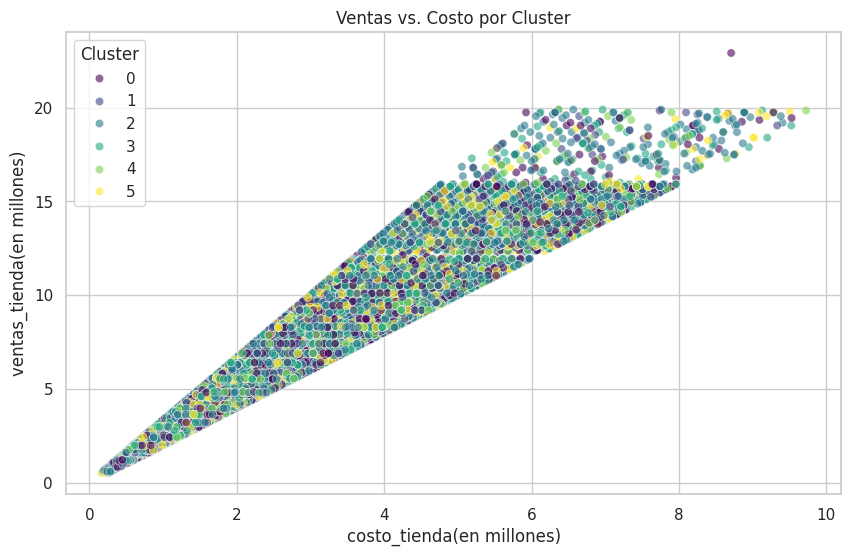

In [ ]:
# Creando el gráfico de Dispersion para Ventas vs. Costo por Cluster
crear_grafico_scatter(datos_raw, 'costo_tienda(en millones)', 'ventas_tienda(en millones)', title='Ventas vs. Costo por Cluster')

**a. Ventas vs. Costo por Cluster:**

Observando el gráfico de dispersión que relaciona las ventas de la tienda con el costo, los clusters parecen estar distribuidos a lo largo de un rango de valores de costo que no se distingue claramente entre los grupos. Esto sugiere que el costo de la tienda no es un factor diferenciador claro entre los clusters.

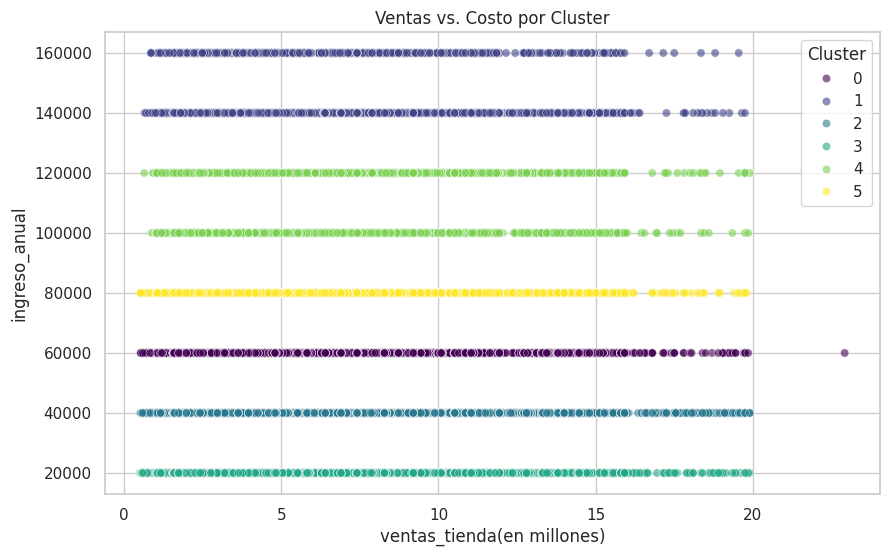

In [ ]:
# Creando el gráfico de Dispersion para Ventas vs. Costo por Cluster
crear_grafico_scatter(datos_raw, 'ventas_tienda(en millones)', 'ingreso_anual', title='Ventas vs. Ingreso Anual')

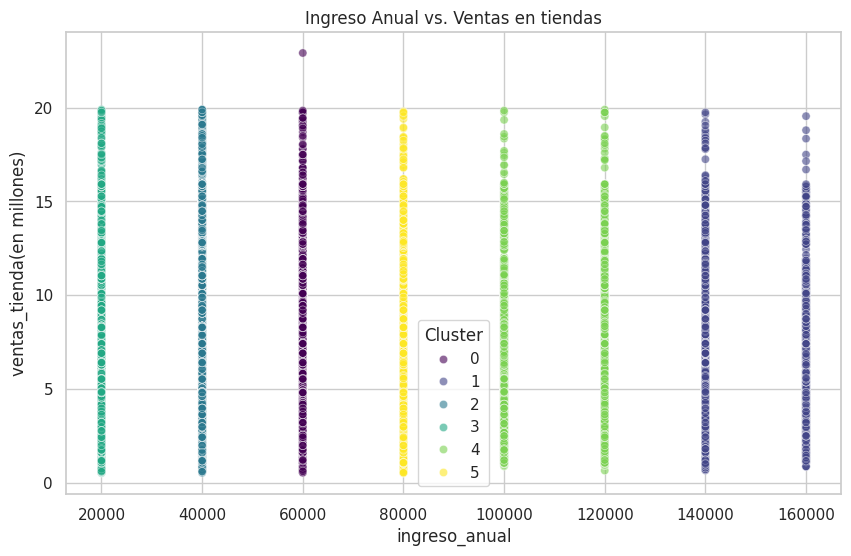

In [ ]:
# Creando el gráfico de Dispersion para Ingreso Anual vs. Gasto por Cluster
crear_grafico_scatter(datos_raw, 'ingreso_anual', 'ventas_tienda(en millones)', title='Ingreso Anual vs. Ventas en tiendas')

**b. Ingreso Anual vs. Ventas en Tiendas:**

 El gráfico de dispersión muestra una amplia dispersión en las ventas en tiendas para cada nivel de ingreso anual. No parece haber una correlación directa entre el ingreso anual y las ventas en tiendas por cluster, lo que indica que el ingreso no determina necesariamente la cantidad que se gasta en tiendas.

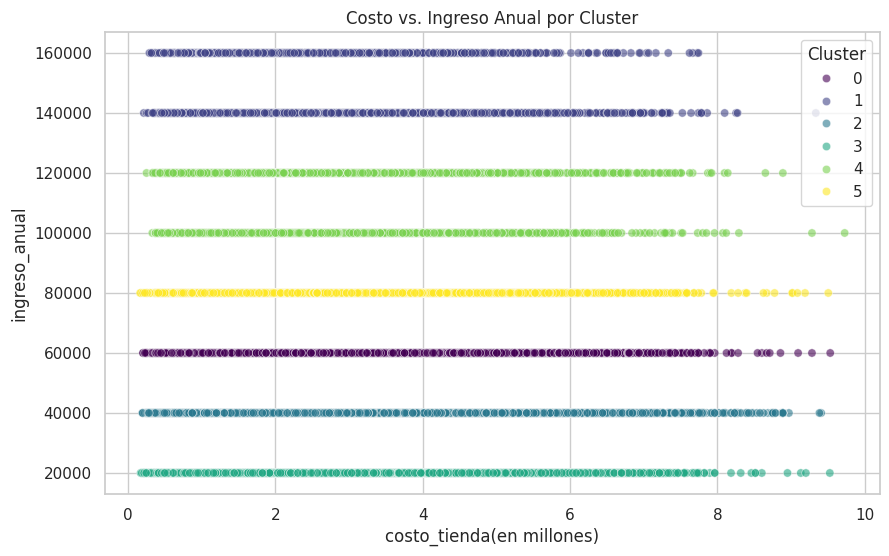

In [ ]:
# Creando el gráfico de Dispersion para Promoción vs. Ventas por Cluster
crear_grafico_scatter(datos_raw, 'costo_tienda(en millones)', 'ingreso_anual', title='Costo vs. Ingreso Anual por Cluster')

**c. Costo vs. Ingreso Anual por Cluster:**

 Este gráfico de dispersión parece mostrar una distribución uniforme del costo en relación con el ingreso anual, lo que indica que el costo de la tienda es relativamente constante independientemente del ingreso anual.

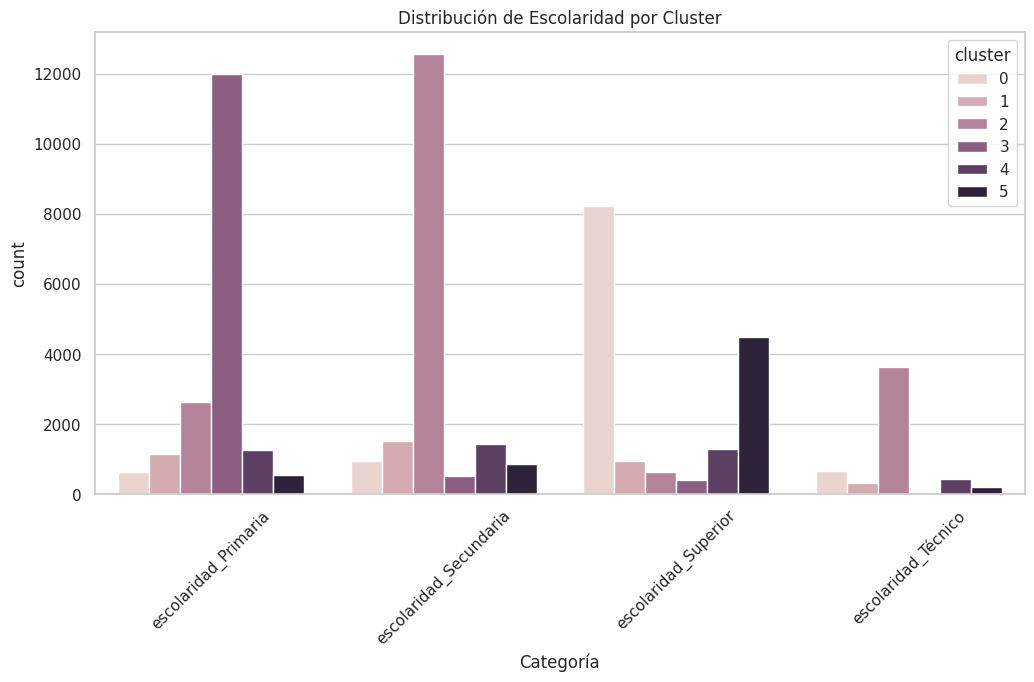

In [ ]:
# Crear gráficos de barras para escolaridad y ocupación
# Función para transformar las columnas y crear gráficos de barras agrupados
def crear_grafico_barras_por_grupo(df, prefijo, titulo, cluster_col='cluster'):
    # Filtrar las columnas que comienzan con el prefijo dado
    columnas = [col for col in df.columns if col.startswith(prefijo)]

    # Transformar el DataFrame
    df_melted = df.melt(id_vars=cluster_col, value_vars=columnas, var_name='Categoría', value_name='Valor')

    # Crear el gráfico de barras
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_melted[df_melted['Valor'] == 1], x='Categoría', hue=cluster_col)
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.show()

# Crear gráficos de barras para escolaridad y ocupación
crear_grafico_barras_por_grupo(datos_raw, 'escolaridad_', 'Distribución de Escolaridad por Cluster')


**d. Distribución de Escolaridad por Cluster:**

 La gráfica de barras indica que hay una variación significativa en los niveles de escolaridad entre los clusters. Algunos clusters tienen una mayor concentración de individuos con escolaridad primaria o secundaria, mientras que otros tienen más individuos con estudios superiores o técnicos.

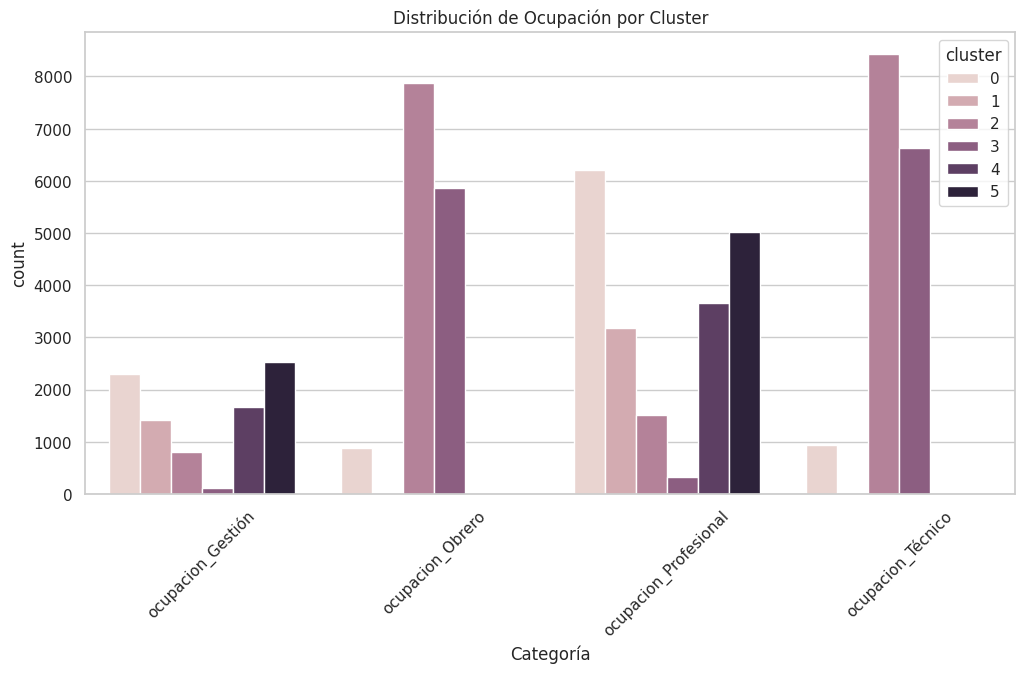

In [ ]:
crear_grafico_barras_por_grupo(datos_raw, 'ocupacion_', 'Distribución de Ocupación por Cluster')

**e. Distribución de Ocupación por Cluster:**

 La gráfica de barras muestra que hay diferencias notables en la ocupación entre los clusters. Algunos clusters tienen una mayor proporción de profesionales, mientras que otros están más orientados hacia ocupaciones de gestión, técnico u obrero.

##6. Descripción de los clusters

### Cluster 0 - Los Económicos Prudentes:

Este cluster podría representar un grupo de clientes con un nivel de gasto y costo en tiendas relativamente bajo. Podría estar compuesto por personas con un nivel de ingreso moderado, quienes son conscientes de sus gastos. Es probable que este grupo busque ofertas y promociones para maximizar el valor de sus compras.

**¿Qué estrategias implementaría?**


*   Estrategia de Precios: Ofrecer descuentos regulares y promociones para  productos esenciales.
*   Marketing: Campañas centradas en la relación calidad-precio y el ahorro.
*   Inventario: Mantener un stock sólido de marcas propias o alternativas económicas.





### Cluster 1 - Los Moderadamente cautelosos:

Este grupo parece tener un comportamiento similar al Cluster 0 en términos de gasto, pero con una variabilidad ligeramente mayor en el costo de la tienda. Esto podría indicar que mientras buscan precios bajos, también están dispuestos a gastar un poco más en ciertas circunstancias o en ciertos productos.

**¿Qué estrategias implementaría?**

*  Upselling: Fomentar la compra de productos de mayor margen a través de recomendaciones personalizadas.
*  Fidelización: Programas de fidelidad que recompensen la repetición de compras y la lealtad.
*  Comunicación: Mensajes de marketing que destacan tanto el valor como la calidad.


### Cluster 2 - Los Diversificados:

Caracterizado por tener una escolaridad que varía desde primaria hasta superior, este cluster podría contener una mezcla de individuos de diferentes estratos sociales y económicos. La diversidad en la escolaridad sugiere que este cluster podría tener una variedad de necesidades y preferencias de compra.

**¿Qué estrategias implementaría?**

*  Variedad de Productos: Asegurar una amplia selección de productos que atienda a la diversidad de este grupo.
*  Segmentación de Marketing: Campañas dirigidas que resuenen con subgrupos dentro del cluster.
*  Educación del Consumidor: Información sobre productos y servicios para ayudar en la toma de decisiones de compra.

### Cluster 3 - Los Técnicos y Vocacionales:

Con una representación significativa de escolaridad secundaria, este cluster puede consistir en individuos que están en la fuerza laboral con empleos que requieren habilidades técnicas o vocacionales. Pueden tener un poder adquisitivo medio y preferir un equilibrio entre calidad y costo.

**¿Qué estrategias implementaría?**

*  Promociones Específicas: Ofertas en herramientas, mejoras para el hogar y productos tecnológicos.
*  Partnerships: Colaboraciones con marcas que apelen a las profesiones de este grupo.
*  Eventos y Talleres: Organizar eventos en la tienda que puedan atraer a este segmento del mercado.


### Cluster 4 - Los Conservadores de Alta Gama:

Este grupo presenta una distribución de ingresos anuales más alta, lo que sugiere que podría estar compuesto por clientes con mayor poder adquisitivo. A pesar de su capacidad económica, el gasto en tiendas parece ser conservador, posiblemente debido a un enfoque en la calidad sobre la cantidad o una preferencia por productos específicos.


**¿Qué estrategias implementaría?**

*  Productos Premium: Aumentar el inventario de productos de alta calidad y de marca.
*  Servicio al Cliente: Proporcionar una experiencia de compra superior con servicios adicionales.
*  Marketing Exclusivo: Utilizar campañas de marketing de alto nivel que enfaticen la exclusividad y el estatus.

### Cluster 5 - Los Aficionados al Lujo:

Con los ingresos anuales más altos y el mayor gasto en tiendas, este cluster puede representar a los clientes premium. Este grupo podría estar menos preocupado por los costos y más enfocado en productos de alta calidad, marcas de prestigio o experiencias de compra exclusivas.


**¿Qué estrategias implementaría?**

*  Experiencias Personalizadas: Ofrecer servicios personalizados y atención al cliente VIP.
*  Productos Exclusivos: Introducir líneas de productos de edición limitada o exclusivas.
*  Eventos Privados: Invitaciones a eventos exclusivos o preventas privadas para miembros del cluster.

# Conclusiones

El proyecto ha demostrado la eficacia del uso de modelos de clustering, como **K-Means**, para segmentar la base de clientes y desarrollar estrategias de marketing y ventas personalizadas. La implementación de técnicas de preprocesamiento, como el uso de **pd.get_dummies** y **OneHotEncoder**, ha sido crucial para convertir características categóricas en numéricas, permitiendo así que el algoritmo de clustering procese y encuentre patrones en los datos de manera efectiva.

## Aspectos Destacados del Proyecto:



***   Uso de K-Means:** La aplicación del algoritmo K-Means permitió identificar grupos distintos dentro de la base de clientes, basándose en factores como las ventas de la tienda, el costo y el ingreso anual.

***   Preprocesamiento de Datos:** La codificación de variables categóricas a través de técnicas de one-hot encoding preparó el conjunto de datos para el análisis, asegurando que todas las variables relevantes fueran consideradas en el modelo.

***   Evaluación de Métricas:** La utilización de métricas como el coeficiente de silueta, el índice Davies-Bouldin y el índice Calinski-Harabasz ayudó a evaluar la calidad de los clusters y a determinar el número óptimo de grupos.

***   Visualización de Datos:** El uso de gráficos de dispersión y boxplots facilitó la interpretación visual de los clusters y proporcionó insights valiosos sobre la distribución de las diferentes variables.

***   Desarrollo de Estrategias:**  La segmentación detallada de los clientes condujo a estrategias de marketing y ventas personalizadas, dentro de estas estrategias se recomiendan seguir algunas como la Análitica y Recolección de Datos (buscando seguir con la recoleccción y análisis de datos para refinar aún más la comprensión de cada cluster) y realización de Pruebas A/B, dirigidas a maximizar la satisfacción del cliente y aumentar la eficiencia operativa.

***   Feedback Continuo:**  La recolección y análisis constantes de datos de clientes permitirán refinar las estrategias a lo largo del tiempo y adaptarlas a las cambiantes dinámicas del mercado.